<a href="https://colab.research.google.com/github/Rogerio-mack/Ling-de-Prog-para-Ciencia-de-Dados/blob/main/PL_Python_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1> 
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1> 

# 4 Estudos de Caso de Análise de Dados I
Professores: *Diego Nogare* & *Rogério de Oliveira* 

<br>
<br>

---


# Introdução 

Nesta trilha vamos compreender como empregar os recursos aprendidos nas trilhas anteriores para desenvolver suas primeiras análises de dados. Essas análises preliminares são importantes e serão, em seguida, refinadas com análises estatísticas e de aprendizado de máquina em componentes posteriores.

Não temos a pretensão aqui de esgotar todo o tema dessa análise, mesmo que preliminar dos dados. Vamos então selecionar dois casos úteis e que poderão servir no futuro para que você faça suas próprias análises. 




# EDA Exploratory Data Analysis
 
EDA consiste de uma exploração inicial e aberta dos dados. Empregando técnicas de natureza gráfica e algumas técnicas quantitativas você busca um entendimento dos dados e responder às primeiras perguntas que vão de encontro ao seu interesse. Para essa exploração é inevitável a necessidade manipular os dados  com seleções, agrupamentos e muitas vezes transformações - como o tratamento de valores faltantes, mudança de formatos ou recodificação. Mas técnicas mais elaboradas como essas serão vistas mais adiante e, em geral, integram a "Preparação" dos dados para a criação de modelos estatísticos ou de aprendizado de máquina. Mas nessa etapa você já responde a muitas perguntas relevantes sobre os dados sem necessitar ainda empregar modelos. 

## O que é EDA?

A **Análise Exploratória de Dados (EDA)** é uma abordagem para análise de dados que emprega uma variedade de técnicas (principalmente gráficas) para
maximizar a percepção e o entendimento de um conjunto de dados:

1. descobrir estrutura a estrutura dos dados
1. extrair variáveis ​​importantes
1. detectar outliers e anomalias (com valores faltantes)
1. testar premissas subjacentes (perguntas que fazemos sobre os dados) 
1. desenvolver modelos simples (no nosso caso: o preço dos vinhos se relacionam a melhores avaliações?)

A abordagem da EDA é precisamente isso - uma abordagem - não um conjunto de técnicas, mas uma atitude / filosofia sobre como uma análise de dados deve ser realizada.

A EDA não é idêntica aos gráficos estatísticos que buscam unicamente caracterizar os dados (embora os dois termos sejam usados ​​quase de forma intercambiável). A EDA adia as suposições usuais sobre que tipo de modelo os dados seguem para uma abordagem de permitir que os próprios dados revelem sua estrutura e modelo subjacentes. 

Mais importante que os aspectos técnicos da EDA é o seu aspecto de *pensamento analítico*. Você deve antes entender que tipo de perguntas são de interesse sobre dados. Esse *pensamento analítico* também deve seguir princípios da ciência em que, a cada análise, seguem-se novas hipóteses a serem analisadas em um processo de refinamento sucessivo. 



## Um Pouco de História
O trabalho seminal de Exploratory Data Analysis é de **Tukey, (1977)**. Ao longo dos anos, ele se beneficiou de outras publicações importantes, como Análise e Regressão de Dados, Mosteller e Tukey (1977), Análise Interativa de Dados, Hoaglin (1977), ABC da EDA, Velleman e Hoaglin (1981) e ganhou muitos seguidores como "a" maneira de analisar um conjunto de dados.



## Um Roteiro simples para o EDA

A maioria das técnicas de EDA é de natureza gráfica, com algumas técnicas quantitativas. Muitas você já pode realizar com o que aprendemos nas trilhas anteriores. A dependência de gráficos é pela própria natureza da EDA que busca explorar os dados de forma aberta em que os dados revelam sua estrutura. 

Um roteiro básico para essa exploração, empregando técnicas de natureza gráfica e quantitativas, pode ser o seguinte: 

1. Explore a estrutura dos dados
1. Examine os dados brutos e atributos relevantes
  1. Gere estatísticas simples sobre os dados
  1. Verifique possíves valores dos atributos
  1. Verifique a qualidade dos dados (valores nulos, inválidos etc.)
1. Responda a perguntas relevantes ou de interesse sobre os dados
1. Análises específicas de interesse:
  1. Evolução ou Tendência dos Dados
  1. Distribuições dos Dados
  1. Quantidades e Proporções 
  1. Relações dos Dados

Para você entender melhor como fazer essas análise vamos empregar dois *cases* de dados. O primeiro, empregando dados da bolsa de valores, e o segundo, dados sobre avaliações de vinho.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Caso: **Índices da Bolsa de Valores**

Quando falamos de Evolução dos dados estamos interessados em observar a evolução, o comportamento, de uma ou mais variáveis dependentes, com relação a uma outra. Você pode estar, por exemplo, interessado em saber como evolui a quantidade de energia produzida por uma turbina à medida que aumenta o fluxo de água, ou como aumenta a acidez de um vinho a medida que a temperatura aumenta. Mas um caso muito frequente é querermos observar a evolução de variáveis com relação ao tempo. Chamamos esse conjunto de dados de série temporal. Existem muitos casos de interesse de séries temporais e, por isso, vale a pena explorarmos um desses casos aqui. As séries temporais requerem todo um ferramental estatístico próprio e há uma série de aspectos que não trataremos (identificação de sazonalidades, periodicidade etc.). Mas poderemos verificar o que nosso ferramental até aqui já pode nos proporcionar para a análise desses dados e entendermos também algumas das dificuldades de lidarmos com esse tipo de dado.  



## Exploração Inicial dos Dados

Devemos começar entendendo a estrutura dos dados que iremos trabalhar. Quantidade de dados, significado dos atributos, formatos, são perguntas essenciais para extrair informações dos dados.

In [ ]:
bovespa = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/bovespa.csv')

display(bovespa.shape)
display(bovespa.head())
display(bovespa.tail())
display(bovespa.Stock.value_counts())
display(bovespa.data.duplicated().sum())
display(bovespa.data.min(),bovespa.data.max())


(129, 3)

,data,Stock,value
0,2020-01-02,VALE3,13.45
1,2020-01-03,VALE3,13.29
2,2020-01-06,VALE3,13.14
3,2020-01-07,VALE3,13.23
4,2020-01-08,VALE3,13.22


,data,Stock,value
124,2020-03-03,DOLAR,4.4724
125,2020-03-04,DOLAR,4.5132
126,2020-03-05,DOLAR,4.5834
127,2020-03-06,DOLAR,4.6062
128,2020-03-09,DOLAR,4.5898


DOLAR    43
VALE3    43
PETR4    43
Name: Stock, dtype: int64

86

'2020-01-02'

'2020-03-09'

O significado dos dados aqui um tanto evidente, mas em muitos casos reais é necessário que sejam fornecidas informações sobre o conteúdo dos dados, *metadados*, como seu significado, unidade empregada etc. Essas informações são dependentes de cada caso e vamos assumir que essas informações, como no nosso exemplo, já são conhecidas. 

A rápida inspeção dos dados acima mostra que temos valores de três índices da bolsa para o período de 2020-01-02 a 2020-03-09. 

## Reshape dos Dados 

Mas a inspeção acima também mostra que os dados não estão exatamente no formato que podíamos esperar: as datas se repetem e os códigos dos índices também. O ideal é que os dados estivessem organizados de forma que cada variável fosse uma coluna e cada observação (ou caso) uma linha. É o que chamamos de **Tidy** (algo equivalente a 3a forma normal de bancos de dados relacionais) e que você poderá consultar mais sobre isso nas referências ao final.  

Essa é uma situação muito comum e comumente, em casos reais, você precisará fazer o *reshape* dos dados para um formato mais adequado. 
 
O `Pandas` fornece várias instruções para reshape de dados como `merge`, `pivot`, `melt` etc. Aqui podemos empregar a instrução  `pivot` para reorganizar os dados no formato *Tidy* data.

In [ ]:
bovespa = pd.pivot(bovespa,columns=['Stock'],values='value',index='data').reset_index() 
bovespa = bovespa.rename_axis('',axis='columns') # este rename é opcional 
bovespa.head()

,data,DOLAR,PETR4,VALE3
0,2020-01-02,4.0163,16.270000,13.45
1,2020-01-03,4.0234,15.990000,13.29
2,2020-01-06,4.0570,16.219999,13.14
3,2020-01-07,4.0604,16.059999,13.23
4,2020-01-08,4.0662,15.700000,13.22


## Diferentes Fontes de Dados

Mais comum ainda é a necessidade de juntarmos dados de diferentes fontes. Como você pode entender isso irá variar bastante de caso a caso, mas aqui podemos fazer uma junção simples de dados e adicionar aos dados um novo índice.


In [ ]:
IBOV = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/IBOV.csv')

display(IBOV.shape)
display(IBOV.head())
display(IBOV.data.min(),bovespa.data.max())

(43, 3)

,data,Stock,value
0,2020-01-02,IBOV,118573.0
1,2020-01-03,IBOV,117707.0
2,2020-01-06,IBOV,116878.0
3,2020-01-07,IBOV,116662.0
4,2020-01-08,IBOV,116247.0


'2020-01-02'

'2020-03-09'

O `Pandas` também fornece várias formas para combinarmos dados (`concat`, `merge` etc.) e aqui talvez pudéssemos apenas adicionar a coluna de valores do índice aos nosso dado inicial. Mas vamos uma *junção* dos dados, algo que pode ser útil para você em muitos casos práticos. A junção funciona de forma análoga a um *join* da SQL.

In [ ]:
IBOV = IBOV.rename(columns={'value':'IBOV'})

In [ ]:
bovespa = pd.merge(bovespa, IBOV[['data','IBOV']], on='data')
display(bovespa.head())

,data,DOLAR,PETR4,VALE3,IBOV
0,2020-01-02,4.0163,16.270000,13.45,118573.0
1,2020-01-03,4.0234,15.990000,13.29,117707.0
2,2020-01-06,4.0570,16.219999,13.14,116878.0
3,2020-01-07,4.0604,16.059999,13.23,116662.0
4,2020-01-08,4.0662,15.700000,13.22,116247.0


## Transformações dos Dados

Muitas transformações também podem ser necessárias para tornar o dado mais adequado para uma análise e são comuns transformações de mudança de tipos, *encode* de dados, formatos etc. como transformações mais elaboradas como a normalização dos dados que faremos mais adiante. 

Neste ponto do nosso exemplo, basta observar que o tipo de dado de 'data', embora apresente os valores de forma correta, não é o tipo de dado *ideal* para esse tipo de informação. Você por exemplo não poderá com esse tipo de dado fazer uma operação de diferença de datas ou obter o dia da semana. Vamos então transformar esse atributo para o formato mais adequado de *datetime*.

In [ ]:
display(bovespa.dtypes)
bovespa.data = pd.to_datetime(bovespa.data, format='%Y-%m-%d',errors='coerce')
display(bovespa.dtypes)

data      object
DOLAR    float64
PETR4    float64
VALE3    float64
IBOV     float64
dtype: object

data     datetime64[ns]
DOLAR           float64
PETR4           float64
VALE3           float64
IBOV            float64
dtype: object

## Qualidade dos Dados

A análise de dados ausentes, *outliers* (dados discrepantes) dentre outras, permitem termos uma ideia da qualidade dos dados e são essenciais antes de prosseguirmos na análise. 

In [ ]:
print(bovespa.isnull().sum())
print(bovespa.describe())

data     0
DOLAR    0
PETR4    0
VALE3    0
IBOV     0
dtype: int64
           DOLAR      PETR4      VALE3           IBOV
count  43.000000  43.000000  43.000000      43.000000
mean    4.265325  14.243721  12.046279  113382.767442
std     0.158326   1.675228   1.287173    6520.692382
min     4.016300   7.260000   7.970000   86067.000000
25%     4.164300  14.205000  11.790000  113765.500000
50%     4.242200  14.630000  12.050000  115528.000000
75%     4.354650  14.915000  13.190000  116689.000000
max     4.606200  16.270000  13.630000  119528.000000


Neste exemplo simples nos limitamos a verificar que não existem valores nulos nos dados e algumas de suas estatísticas. 

## Explorando os Dados

A partir daí estamos mais ou menos prontos para analisar questões específicas dos dados. Dependendo do problema você pode querer analisar: evoluções ou tendência dos dados, distribuições dos dados, analisar quantidades e proporções, relações etc.  Neste exemplo vamos nos concentrar na análise de evolução dos índices da bolsa no período o que nos permitirá aprender e praticar algumas técnicas bastante importantes e comuns. 




### Linha de Tendência Linear 

Aqui você vai encontrar um problema muito comum ao buscarmos tendências em dados temporais. Sua variável independente (a linha do tempo) não pode ser aplicada diretamente a uma regressão linear (ou outra qualquer) pois seus dados não são numéricos. Para fazer isso teremos de empregar um artifício e transformar a linha do tempo em um atributo numérico.

Isso pode ser feito atribuindo-se para cada data do conjunto de dados um valor inteiro diferente a partir de 0. Se cada linha do conjunto de dados corresponde a uma data, esse valor pode ser o próprio índice do seu conjunto de dados (para um `DataFrame`, `df.index`).






In [ ]:
bovespa.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42],
           dtype='int64')

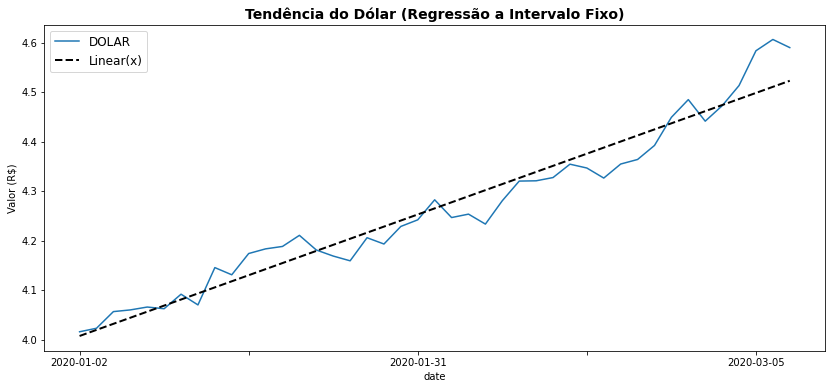

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.index, bovespa.DOLAR, label='DOLAR')

ax.set_title('Tendência do Dólar (Regressão a Intervalo Fixo)', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")

z = np.polyfit(bovespa.index,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.index,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

# OU
# x = np.arange(0,len(bovespa),1)
# z = np.polyfit(x,bovespa.DOLAR, 1)
# p = np.poly1d(z)
# ax.plot(bovespa.data,p(x), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.set_xticklabels(['',bovespa.iloc[0].data.date(),'',bovespa.iloc[20].data.date(),'',bovespa.iloc[40].data.date()])

plt.show()

Não se prenda muito aos detalhes do gráfico, o que queremos que você entenda é a forma geral e alguns problemas que você deverá lidar quando trabalha com séries temporais. Os detalhes você poderá deixar para quando estiver trabalhando com o caso específico seu.

O procedimento acima é útil para em muitos casos que envolvem séries temporais. Acima empregamos o índice dos dados (43 valores de $[0,43]$ para cada data) para linha de tempo da regressão mas, na ausência de um índice, podemos criar um valor diferente para cada data empregando, por exemplo:

```
x = np.arange(0,len(bovespa),1)
```

isso encontra-se comentado no código acima como uma forma opcional.

Há, entretanto, uma série de detalhes nisso. Por exemplo, você pode ter intervalos de datas diferentes e, neste caso, pode ser necessário associar a cada data a distância com relação a menor data no seu conjunto de dados (não empregando portanto valores com um incremento fixo como fizemos). 

No nosso exemplo, como os dados da bolsa referem-se a dias úteis há intervalos de datas maiores nos finais de semana e feriados e, embora os resultados sejam praticamente os mesmos aqui, a rigor precisamos empregar intervalos de datas diferentes e para muitos casos isso pode ser realmente necessário. Fazemos esse procedimento abaixo adicionando um novo atributo com quantidade de dias a partir da data inicial. A função `dt.days` permite transformar esses valores para o cálculo da regressão.  

In [ ]:
bovespa['dias'] = bovespa['data'] - bovespa['data'].min()

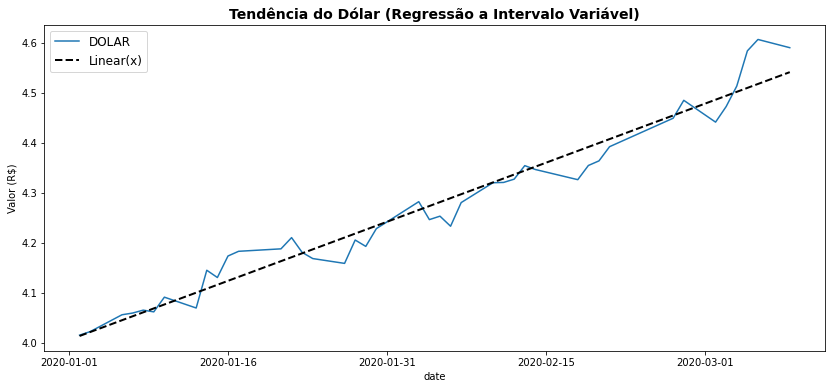

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')

ax.set_title('Tendência do Dólar (Regressão a Intervalo Variável)', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")

z = np.polyfit(bovespa.dias.dt.days,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))

plt.show()

Aqui o resultado é praticamente o mesmo, mas para os casos onde os intervalos de data tenham diferenças maiores isso poderá ser relevante.

### Linha de Tendência Média 

Uma outra forma de entendermos as linhas de tendência dos dados é empregarmos a média dos vários valores e ligar esses pontos a uma linha de tendência. Aqui não buscamos aproximar nenhum modelo prévio, como um modelo linear ou polinomial, mas exibimos simplesmente uma média de tendência dos dados.



Essa linha média ainda pode ser incrementada com uma margem de erro, por exemplo o desvio padrão, permitindo acompanhar a dispersão dos dados ao longo da linha média. Para isso, no lugar do `plot` você poderá empregar o comando `plt.errorbar`. Como nossos dados apresentam apenas uma única cotação diária, iremos agregar a cotações em semanas e exibir as cotações semanais.



In [ ]:
bovespa['week'] = bovespa['data'].dt.isocalendar().week

In [ ]:
bovespa.head()

,data,DOLAR,PETR4,VALE3,IBOV,dias,week
0,2020-01-02,4.0163,16.270000,13.45,118573.0,0 days,1
1,2020-01-03,4.0234,15.990000,13.29,117707.0,1 days,1
2,2020-01-06,4.0570,16.219999,13.14,116878.0,4 days,2
3,2020-01-07,4.0604,16.059999,13.23,116662.0,5 days,2
4,2020-01-08,4.0662,15.700000,13.22,116247.0,6 days,2


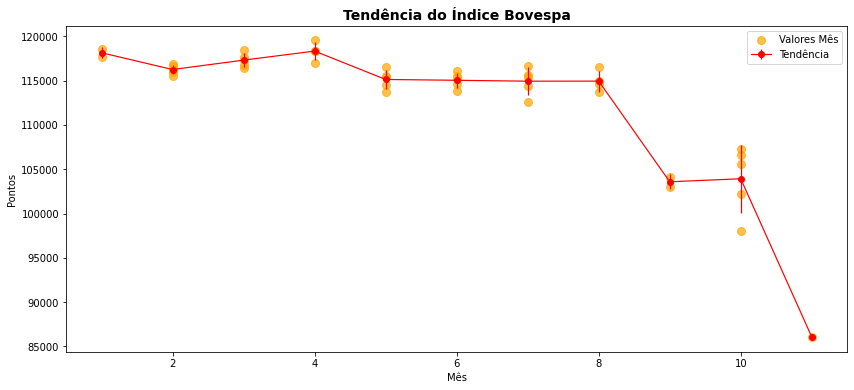

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

yerr = []
ymean = []
for w in bovespa.week.unique():
  yerr.append(bovespa[bovespa.week == w]['IBOV'].std())
  ymean.append(bovespa[bovespa.week == w]['IBOV'].mean())
yerr = np.array(yerr)  
ymean = np.array(ymean) 

plt.errorbar(bovespa.week.unique(), ymean, yerr=yerr, label='Tendência', marker='o', color='r', linewidth=1.2)
plt.scatter(bovespa.week, bovespa.IBOV, label='Valores Mês', marker='o', color='orange', alpha=0.7, s=64)

plt.title("Tendência do Índice Bovespa", fontsize=14, weight='bold')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.show()

O mesmo procedimento poderia ser feito se tivéssemos cotações diárias do índice, e se já você acompanhou gráficos empregados na análise técnica de ações da bolsa na mídia ou em aplicativos de investimento, deve notar a semelhança dos gráficos. No caso de ações da bolsa, entretanto, é mais comum essa tendência ser acompanhada por gráficos de caixa, ou `boxplot` como abaixo.

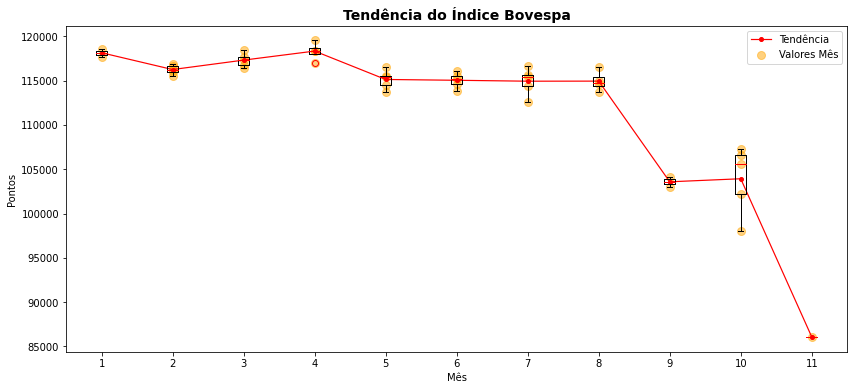

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

plt.plot(np.array(bovespa.week.unique()), ymean, 'r-', label='Tendência', marker='o', linewidth=1.2, markersize=4)
plt.scatter(bovespa.week, bovespa.IBOV, label='Valores Mês', marker='o',  alpha=0.5, s=64, color='orange')
for week in bovespa.week.unique():
  plt.boxplot(bovespa[bovespa.week == week].IBOV, positions=[week], widths=0.15, flierprops=dict(color='r',markeredgecolor='r'),medianprops=dict(color='r'))

plt.title("Tendência do Índice Bovespa", fontsize=14, weight='bold')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.show()

Os gráficos de caixa funcionam como uma forma sintética de exibir distribuições e você pode, por exemplo, observar a maior dispersão dos dados na semana 10.



### Comparando Escalas Diferentes

Se você empregar agora diretamente o gráfico anterior para analisar a tendência não só do índice Bovesapa mas também um dos demais índices o resultado não irá ser dos melhores como você pode observar:

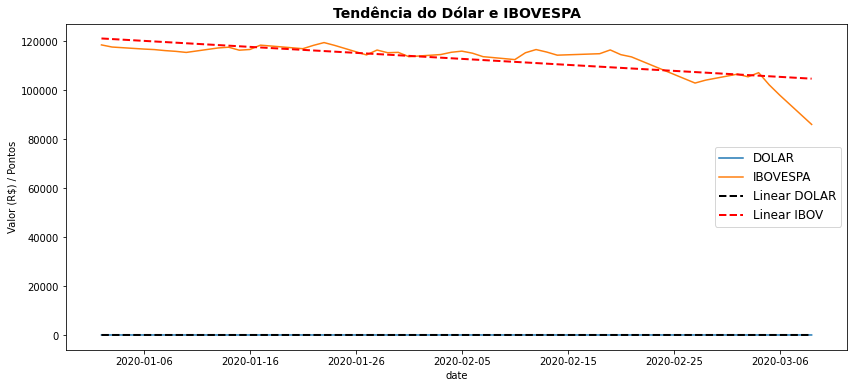

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')
ax.plot(bovespa.data, bovespa.IBOV, label='IBOVESPA')

ax.set_title('Tendência do Dólar e IBOVESPA', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$) / Pontos")

z = np.polyfit(bovespa.dias.dt.days,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear DOLAR' ,linewidth=2, color='k')

z = np.polyfit(bovespa.dias.dt.days,bovespa.IBOV, 1)
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear IBOV' ,linewidth=2, color='r')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

Se você observar com atenção o mal resultado dessa visualização é por quê os dados estão em escalas de valores muito diferentes e você não consegue, no mesmo gráfico, observar claramente as variáveis do dólar que se encontram em um intervalo $4 \pm 1$ de valores e os valores de índice Bovespa, no intervalo $100000 \pm 10000$.

O comando `ax.twinx()` no modo `Artist Layer` pode ser uma alternativa. Ele permite você apresentar duas escalas diferentes no mesmo gráfico e podemos assim comparar a tendência das duas séries de dados simultaneamente.

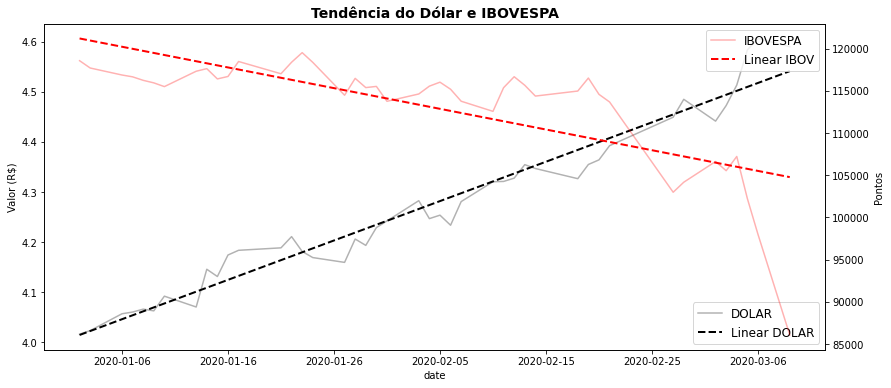

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR', color='k', alpha=0.3)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(bovespa.data, bovespa.IBOV, label='IBOVESPA', color='r', alpha=0.3)

ax.set_title('Tendência do Dólar e IBOVESPA', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")
ax2.set_ylabel("Pontos")

z = np.polyfit(bovespa.dias.dt.days,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear DOLAR' ,linewidth=2, color='k')

z = np.polyfit(bovespa.dias.dt.days,bovespa.IBOV, 1)
p = np.poly1d(z)
ax2.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear IBOV' ,linewidth=2, color='r')

ax.legend(loc='lower right',fontsize=12)
ax2.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

Esse procedimento, entretanto, só é útil quando temos até duas escalas diferentes de dados. Para mais de duas escalas a forma que podemos empregar é a normalização dos dados. 

$\rightarrow$ *Cuidado ao empregar normalizações dos dados! Ao exibir os dados normalizados você não estará mais observando os valores reais dos dados, mas  seus movimentos relativos.*

Existem várias formas de normalização e poderíamos aplicar simplesmente uma normalização *min/max*, dividindo cada valor pelo seu valor máximo, e levar cada valor para o intervalo $[0,1]$. Mas vamos adotar um procedimento muito usado, e igualmente simples, aplicando uma normalização conhecida como *standard scaler* que normaliza os valores levando o conjunto de dados a uma média 0 e desvio padrão 1.

$$ z = \frac{x - \bar{x}}{\sigma(x)}$$

O resultado encontra-se abaixo.

In [ ]:
bovespa_norm = ( bovespa.drop(columns=['data','dias','week']) - bovespa.drop(columns=['data','dias','week']).mean() ) / bovespa.drop(columns=['data','dias','week']).std()
bovespa_norm = pd.concat([bovespa[['data','dias','week']], bovespa_norm],axis=1)
bovespa_norm.head()


,data,dias,week,DOLAR,PETR4,VALE3,IBOV
0,2020-01-02,0 days,1,-1.572860,1.209554,1.090545,0.795963
1,2020-01-03,1 days,1,-1.528018,1.042412,0.966242,0.663155
2,2020-01-06,4 days,2,-1.315796,1.179707,0.849708,0.536022
3,2020-01-07,5 days,2,-1.294322,1.084198,0.919628,0.502896
4,2020-01-08,6 days,2,-1.257690,0.869302,0.911860,0.439253


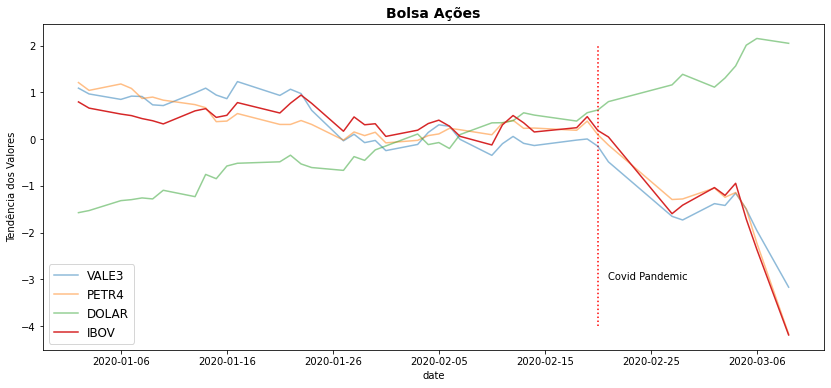

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa_norm.data, bovespa_norm.VALE3, label='VALE3', alpha=0.5)
ax.plot(bovespa_norm.data, bovespa_norm.PETR4, label='PETR4', alpha=0.5)
ax.plot(bovespa_norm.data, bovespa_norm.DOLAR, label='DOLAR', alpha=0.5)
ax.plot(bovespa_norm.data, bovespa_norm.IBOV, label='IBOV')

ax.set_title('Bolsa Ações', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Tendência dos Valores")

ax.legend(fontsize=12)

plt.vlines(np.datetime64('2020-02-20'),-4,2,color='r', linestyles=':')
plt.text(np.datetime64('2020-02-21'),-3,'Covid Pandemic')
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

Não vamos tirar conclusões sobre esses dados e podemos deixar isso para os economistas e analistas de mercado. Nosso interesse aqui é que você entenda algumas técnicas análise com os recursos que já aprendemos e que poderão ser úteis a você em muitos casos. É, de qualquer modo, fácil ver que o índice da bolsa segue de forma bastante próxima os movimentos das ações da VALE3 e PETR4, e identificar a presença de vales do índice quando de fortes aumentos do dólar. Podemos identificar também a inversão dos movimentos do mercado com o início da pandemia de Covid no Brasil no começo de 2020. 

# Caso: **Vinhos no Mundo**

Vamos agora explorar um conjunto de dados com cerca de 130.000 avaliações de Vinhos. Em geral o objetivo da análise é de responder perguntas sobre os dados, hipóteses que lançamos sobre os dados e que buscamos confirmar. Vamos, assim, tentar responder a várias perguntas relevantes e curiosas sobre esse mercado, como *Que região do Brasil produz mais vinhos dentro dos avaliados?* ou *Se os vinhos Franceses são mesmo mais caros e mais bem avaliados?* 



## Exploração Inicial dos Dados

Aqui não vamos nos preocupar com diferentes fontes de dados ou transformações. O formato dos dados, como você pode verificar na rápida inspeção abaixo também parece adequada e poderemos seguir diretamente para verificar a qualidade dos dados.


In [ ]:
wine = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/winemag-data-130k-v2.csv')

display(wine.shape)
display(wine.head())


(129971, 14)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Qualidade dos Dados

Podemos observar que existem poucos vinhos nacionais avaliados e que a base possui um grande número de valores ausentes.

In [ ]:
display( wine.country.value_counts()[0:10] )
print( 'Percentual de vinhos nacionais: ', wine[wine.country == 'Brazil'].country.count() / len(wine))
display( wine.isnull().sum() / len(wine) )

US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
Name: country, dtype: int64

Percentual de vinhos nacionais:  0.00040008925067899764


Unnamed: 0               0.000000
country                  0.000485
description              0.000000
designation              0.288257
points                   0.000000
price                    0.069215
province                 0.000485
region_1                 0.163475
region_2                 0.611367
taster_name              0.201922
taster_twitter_handle    0.240154
title                    0.000000
variety                  0.000008
winery                   0.000000
dtype: float64

Particularmente, vamos estar interessados aqui no preço dos vinhos e a presença de valores ausentes é algo que você precisará ter em mente ao produzir estatísticas, como média e desvio padrão, desse dado. Nos casos em que você emprega os dados em algoritmos de aprendizado pode ser até necessário você *tratar* os valores ausentes eliminando as linhas, os atributos ou mesmo imputando valores. 

## Explorando Perguntas Relevantes sobre os Dados

Vamos agora fazer uma série de perguntas sobre os dados e buscar respondê-las a partir de seleções ou visualizações dos dados.

### Qual o país com mais vinhos avaliados e qual a posição do Brasil?

Aqui é útil empregarmos a função `countplot` do `Seaborn`, ou empregar o `groupby` do `Pandas` para obter essas respostas.

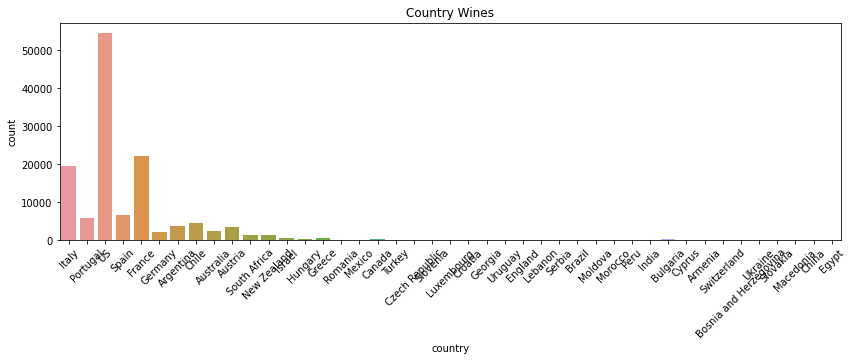

In [ ]:
plt.figure(figsize=(14,4))
sns.countplot(x=wine.country)
plt.title('Country Wines')
plt.xticks(rotation=45)
plt.show()

In [ ]:
pd.DataFrame(wine.country.value_counts()).reset_index()[23:30]

,index,country
23,Croatia,73
24,Mexico,70
25,Moldova,59
26,Brazil,52
27,Lebanon,35
28,Morocco,28
29,Peru,16


### Qual a origem e o tipo de vinhos mais baratos e mais caros avaliados? 

Os operadores `nlargest` e `nsmallest` do `Pandas` são bastante úteis para responder esse tipo de questões sobre os dados.

In [ ]:
wine.loc[wine.price.nlargest(5).index][['country','title','variety','price']]

,country,title,variety,price
80290,France,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,3300.0
15840,France,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,2500.0
98380,France,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,2500.0
120391,US,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,2013.0
65352,France,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,2000.0


In [ ]:
wine.loc[wine.price.nsmallest(5).index][['country','title','variety','price']]

,country,title,variety,price
1987,Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,4.0
20484,US,Dancing Coyote 2015 White (Clarksburg),White Blend,4.0
29553,Argentina,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,4.0
31530,US,Bandit NV Chardonnay (California),Chardonnay,4.0
59507,US,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,4.0


E não deve ser surpresa para você que os vinhos Bordeaux e Franceses estão entre os mais caros vinhos avaliados.

### Como estão distribuídos os preços dos vinhos no Brasil e no Mundo?

As análises gráficas muitas vezes requerem sucessivos refinamentos. 

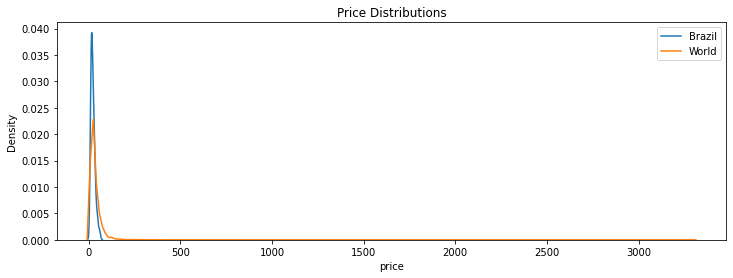

In [ ]:
plt.figure(figsize=(12,4))
sns.kdeplot(wine[wine.country == 'Brazil'].price,label='Brazil')
sns.kdeplot(wine.price,label='World')
plt.title('Price Distributions')
plt.legend()
plt.show()


Ao fazermos o gráfico de distribuição acima podemos ver que a maior parte dos vinhos (área abaixo da curva) se encontra abaixo dos USD 100. Mas a visualização é bastante prejudicada pela dispersão dos valores e os valores discrepantes, como podemos ver com um gráfico `boxplot`.

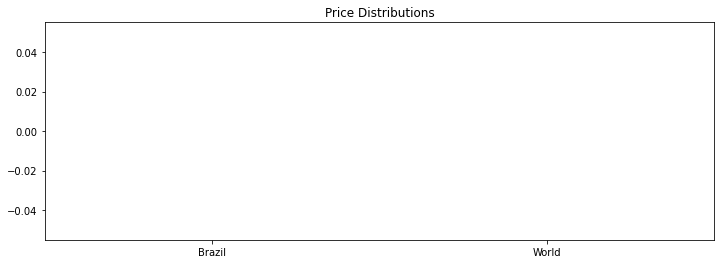

In [ ]:
plt.figure(figsize=(12,4))
plt.boxplot(wine[wine.country == 'Brazil'].price,positions=[1])
plt.boxplot(wine.price,positions=[2])
plt.title('Price Distributions')
plt.xticks(ticks=[1,2], labels=['Brazil','World'])
plt.show()

Mas o gráfico acima não exibe os valores! De fato, como existem valores nulos em `price` o `Matplotlib` falha em calcular as estatísticas dos quartis requeridas. Desse modo temos que excluir os valores nulos. Há muitas formas de se fazer isso e adotaremos aqui o modo mais simples e direto. 

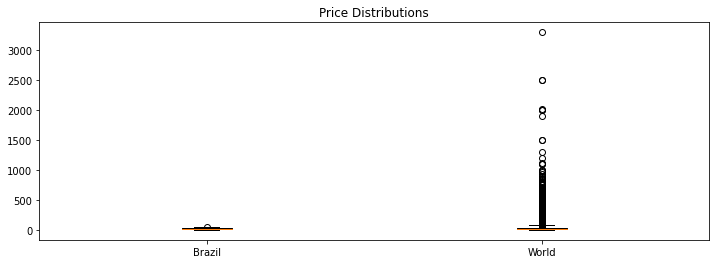

In [ ]:
wine_not_null = wine[ ~ np.isnan( wine.price ) ] 

plt.figure(figsize=(12,4))
plt.boxplot(wine_not_null[wine_not_null.country == 'Brazil'].price,positions=[1])
plt.boxplot(wine_not_null.price,positions=[2])
plt.title('Price Distributions')
plt.xticks(ticks=[1,2], labels=['Brazil','World'])
plt.show()

Fica evidente assim a presença de inúmeros outliers nos dados e podemos, assim, excluí-los para uma melhor visualização.

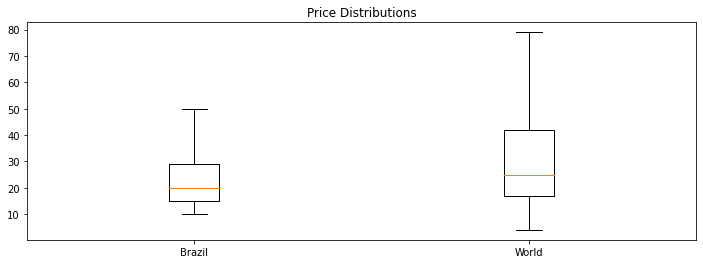

In [ ]:
plt.figure(figsize=(12,4))
plt.boxplot(wine_not_null[wine_not_null.country == 'Brazil'].price,positions=[1],showfliers=False)
plt.boxplot(wine_not_null.price,positions=[2],showfliers=False)
plt.title('Price Distributions')
plt.xticks(ticks=[1,2], labels=['Brazil','World'])
plt.show()

Observamos assim que vinhos acima de USD 80 são valores discrepantes no mercado, estando a maior parte dos vinhos abaixo de USD 50-40, e que os valores dos vinhos nacionais não são, afinal, tão distantes do mercado mundial.

### De que regiões vem os vinhos Brasileiros avaliados?

Talvez você esteja curioso em saber a origem dos vinhos nacionais e essa é uma pergunta bastante simples de ser respondida, e não deve ser surpresa descobrir que a maior parte dos vinhos nacionais avaliados vem da Serra Gaúcha.

In [ ]:
wine[wine.country == 'Brazil'].province.unique()

array(['Pinto Bandeira', 'Santa Catarina', 'Campanha', 'Serra Gaúcha',
       'Vale dos Vinhedos', 'Brazil', 'Vale Trentino', 'Serra do Sudeste'],
      dtype=object)

In [ ]:
wine[wine.country == 'Brazil'].groupby('province').province.count()

province
Brazil                7
Campanha              4
Pinto Bandeira        6
Santa Catarina        2
Serra Gaúcha         18
Serra do Sudeste      1
Vale Trentino         5
Vale dos Vinhedos     9
Name: province, dtype: int64

Eles, entretanto, não são os vinhos em média mais caros do Brasil.


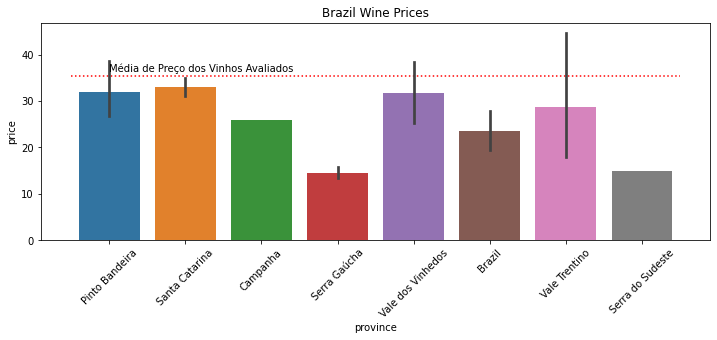

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine[wine.country == 'Brazil'].province, y=wine[wine.country == 'Brazil'].price)
plt.title('Brazil Wine Prices')
plt.hlines(wine.price.mean(),-0.5,7.5,color='r',linestyles=':')
plt.text(0, wine.price.mean()+1,'Média de Preço dos Vinhos Avaliados')
plt.xticks(rotation=45)
plt.show()


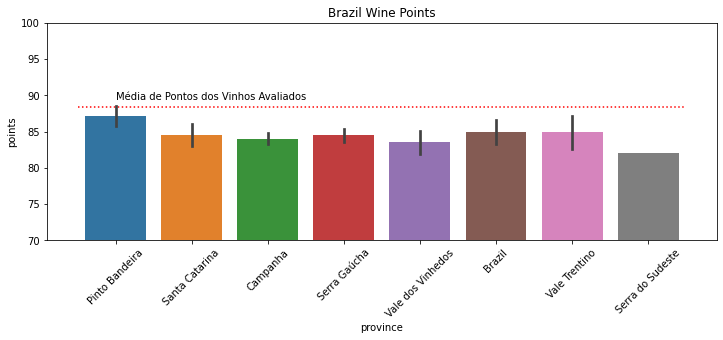

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine[wine.country == 'Brazil'].province, y=wine[wine.country == 'Brazil'].points)
plt.title('Brazil Wine Points')
plt.hlines(wine.points.mean(),-0.5,7.5,color='r',linestyles=':')
plt.text(0, wine.points.mean()+1,'Média de Pontos dos Vinhos Avaliados')
plt.xticks(rotation=45)
plt.ylim([70,100])
plt.show()

E, portanto, talvez você não precise pagar mais para tomar um bom vinho. 

Mas de qualquer modo, os vinhos brasileiros estão têm preços abaixo da média mundial, mas também avaliações abaixo da média.

### Os melhores vinhos são os vinhos mais caros? 

É claro que aqui consideramos *melhores* os vinhos melhor avaliados. De fato, uma simples exibição dos dados permite ver essa relação.

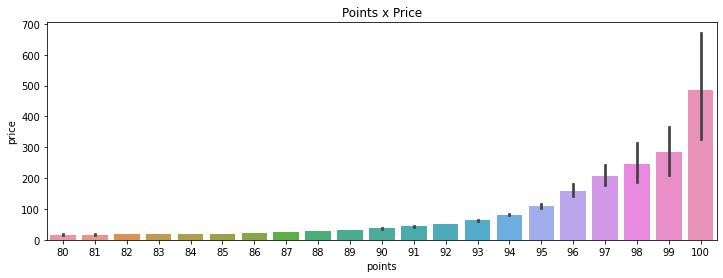

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine.points, y=wine.price)
plt.title('Points x Price')
plt.show()

Mais adiante no curso, quando você conhecer técnicas estatísticas como testes de hipóteses, pode aplicar neste caso e confirmar a dependência e as avaliações e o preço,  que observamos aqui visualmente.  

### Os vinhos Franceses são mesmo os mais caros e bem avaliados?

Embora os vinhos Franceses superem em preço e pontuação as médias globais, uma análise mais detalhada mostra que existem muitos países que parecem apresentar vinhos melhores e mais caros. 

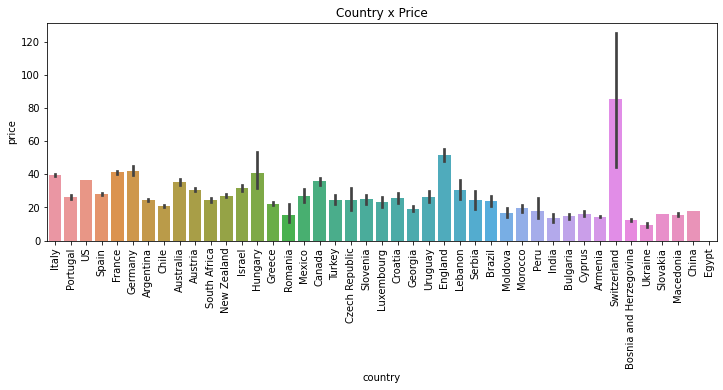

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine.country, y=wine.price)
plt.title('Country x Price')
plt.xticks(rotation=90)
plt.show()


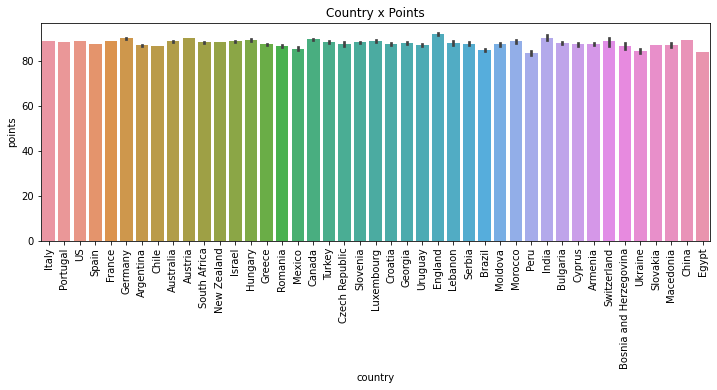

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine.country, y=wine.points)
plt.title('Country x Points')
plt.xticks(rotation=90)
plt.show()

Novamente a visualização falha em mostrar adequadamente os dados, mas aqui o refinamento é bastante simples e basta reconfigurarmos os limites do eixo de pontos.

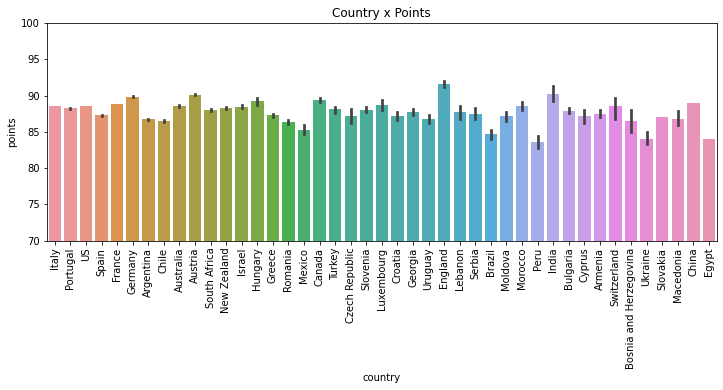

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x='country', y='points', data=wine)
plt.title('Country x Points')
plt.xticks(rotation=90)
plt.ylim([70,100])
plt.show()

### Conclusão das Análises

Podemos nos estender por muito mais análises desses dados, mas quando trabalhamos em um caso real o objetivo da 
análise vai direcionar e limitar essas possibilidades.

De qualquer modo qualquer análise deve ter uma conclusão e aqui poderíamos resumir alguns dos nossos resultados.

Os vinhos brasileiros avaliados são produzidos em sua maioria na região sul do país. São vinhos bastante baratos em comparação ao mercado internacional, mas também vinhos  mal avaliados quando comparados à média mundial. O preço e pontuação dos vinhos são bastante relacionados, mas há uma faixa de vinhos bastante bem avaliados e com preços abaixo de USD 50 (gráfico abaixo), o que sugere que não é necessário gastar mais do que isso para beber um *excelente* vinho. Os vinhos Franceses, bastante famosos, embora superem em qualidade e preço a média dos demais países, são surpreendentemente superados por outros países como a Índia, Inglaterra e Alemanha.  

Novamente, essas análises são apenas um exercício sobre as técnicas que queremos explorar e conclusões mais definitivas deveríamos deixar a cargo de *sommeliers*. 



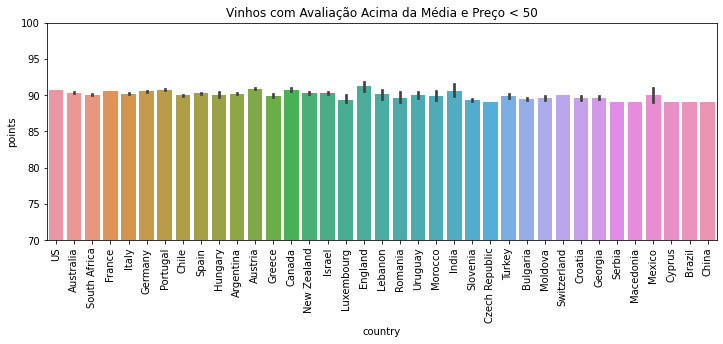

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x='country', y='points', data=wine[ (wine.price < 50) & (wine.points > wine.points.mean() ) ])
plt.title('Vinhos com Avaliação Acima da Média e Preço < 50')
plt.xticks(rotation=90)
plt.ylim([70,100])
plt.show()

# Síntese

Nesta trilha empregamos vários recursos de `Python` e de suas bibliotecas (`Pandas`, `Matplotlib`, `Seaborn`) para fazermos análises a partir de seleção, transformações e  visualizações dos dados. 

Não se preocupe com os detalhes de cada operação empregada aqui. Elas são menos importantes do que você entender o pensamento analítico por traz dessas análises: hipóteses que são sucessivamente verificadas e refinadas sobre os dados. 
Mais importante que os aspectos técnicos da EDA (Exploratory Data Analysis) é seu *pensamento analítico* e você deve saber o que deseja buscar nos dados muito antes de codificar as soluções. As técnicas vão variar de caso para caso, elas podem diferir muito dos exemplos que apresentamos e, com os fundamentos que você aprendeu, você poderá buscá-las quando tiver necessidade de empregá-las.   



## Para saber mais

Acesse https://www.kaggle.com/ e pesquise por EDA. Você vai encontrar uma série de *cases* de exploração de dados que poderão interessar a você. 

O próximo passo que você daria após essa análise dos dados talvez fosse a preparação dos dados tornando-os mais adequados para criação de modelos estatísticos ou de aprendizado de máquina. Para uma rápida introdução sobre isso em `Python` você pode acessar https://www.kaggle.com/learn/data-cleaning. 

Para entender mais sobre dados organizados acesse o artigo original de Wickham, Hadley, **Tidy Data** (2013), em https://www.jstatsoft.org/index.php/jss/article/view/v059i10/v59i10.pdf.

## Referências

1. Wickham, Hadley. **Tidy Data** (2013). Journal of Statistical Software. Disponível em: https://www.jstatsoft.org/index.php/jss/article/view/v059i10/v59i10.pdf Acesso: 17 de junho de 2021.

1. Hadley Wickham, Garrett Grolemund. **R for Data Science: Import, Tidy, Transform, Visualize, and Model Data**. O'Reilly Media Inc. (2017). (alternativamente disponível em: https://r4ds.had.co.nz/).  

1. Jake VanderPlas. **Python Data Science Handbook**. O'Reilly Media, Inc. (2016). ISBN: 9781491912058. 
Disponível em: https://jakevdp.github.io/PythonDataScienceHandbook/. Acesso: 17.05.2021 

1. Rogério de Oliveira. **Introdução à Visualização de Dados com Python**.  Ed. Mackenzie. Coleção Conexão Inicial. *pre-print (2021)* Disponível em: https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python.Acesso: 17.05.2021 